LeveneResult(statistic=2.23639285865642, pvalue=0.1349271874358367)
t-test Ttest_indResult(statistic=1.739500051509261, pvalue=0.04103781796979767)
t-test Ttest_indResult(statistic=1.9906855981796339, pvalue=0.025901076701673117)
t-test Ttest_indResult(statistic=1.3046092191451777, pvalue=0.0963771043887324)
t-test Ttest_indResult(statistic=4.645267399098214, pvalue=0.002108525780538078)


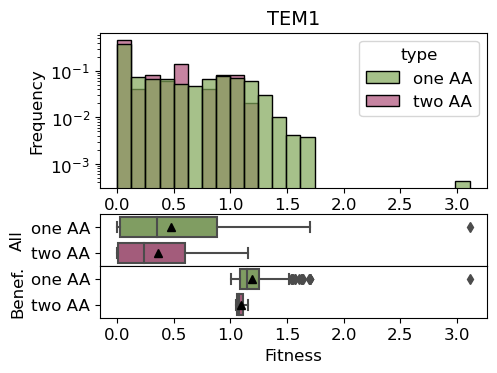

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene

# Define font sizes for the plot
SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

# Configure the plot font sizes using matplotlib settings
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


data=pd.read_csv("../../../Data_TEM1/data_TEM1_Codon_Substitutions.csv")
dataCrossCodons=pd.read_csv("../../../Data_TEM1/data_TEM1_CrossCodonsDoubles.csv")


data = data.dropna(subset=['mutation'])


data = data[data['mutation'] == 'double']
data['mutation'] = data['mutation'].replace({'double': 'one AA'})


data = pd.concat([data, dataCrossCodons], ignore_index=True)
data['mutation'] = data['mutation'].replace({'double': 'two AA'})


data = data[data['fitness'] != 'unknown']
data['fitness'] = data['fitness'].astype(float)


#####################################################
#####################################################

data.rename(columns={'mutation':'type'}, inplace = True)


##########################################################################################

fitness_one_AA = data[data['type'] == 'one AA']['fitness'].tolist()
fitness_two_AA = data[data['type'] == 'two AA']['fitness'].tolist()

filtered_fitness_one_AA = [num for num in fitness_one_AA if num > 1]
filtered_fitness_two_AA = [num for num in fitness_two_AA if num > 1]


print(levene(fitness_one_AA, fitness_two_AA))

#print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=True, alternative="greater", trim=0.1))
#print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=False, alternative="greater", trim=0.1))

print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=True, alternative="greater"))
print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=False, alternative="greater"))

print("t-test", stats.ttest_ind(filtered_fitness_one_AA,filtered_fitness_two_AA, equal_var=True, alternative="greater"))
print("t-test", stats.ttest_ind(filtered_fitness_one_AA,filtered_fitness_two_AA, equal_var=False, alternative="greater"))

##########################################################################################

# create a figure with two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(5, 3.7), gridspec_kw={'height_ratios': [3, 0.5,1,1], "hspace":0},)

# create a histogram using seaborn
sns.histplot(data=data, x="fitness", hue="type", palette=["#80a758", "#af5079"], log_scale=(False, True),hue_order=['one AA', 'two AA'],stat='probability', alpha=0.7, common_norm=False, legend=True, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Frequency')
ax1.set_title('TEM1')

ax2.axis("off")

sns.boxplot(data=data, x="fitness", y="type", palette=["#80a758", "#af5079"], order=['one AA', 'two AA'], showmeans=True, meanprops={"markerfacecolor":"black", "markeredgecolor":"black"}, ax=ax3,)

xmin, xmax = ax1.get_xlim()
ax3.set_xlim([xmin, xmax])
ax3.set_xlabel('')
ax3.set_ylabel('All')


data = data[data['fitness'] > 1]
sns.boxplot(data=data, x="fitness", y="type", palette=["#80a758", "#af5079"], order=['one AA', 'two AA'], showmeans=True, meanprops={"markerfacecolor":"black", "markeredgecolor":"black"}, ax=ax4,)
xmin, xmax = ax1.get_xlim()
ax4.set_xlim([xmin, xmax])
ax4.set_xlabel('Fitness')
ax4.set_ylabel('Benef.')


#plt.savefig("One_vs_Two_AA.pdf", bbox_inches = "tight")

plt.show()